In [57]:
!pip install --upgrade --no-cache-dir gdown
!gdown 148NfQdBsKq3YFKB262wREEbHzJT-EmP8

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=148NfQdBsKq3YFKB262wREEbHzJT-EmP8
To: /content/custom_data.csv
100% 29.0k/29.0k [00:00<00:00, 58.3MB/s]


In [1]:
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=1000,
                           n_features=3,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=4,
                           n_clusters_per_class=1,
                           weights=[0.2, 0.4, 0.1, 0.3],
                           flip_y=0.01,
                           class_sep=1.5,
                           hypercube= True,
                           shift=2,
                           scale=0.5,
                           shuffle=True,
                           random_state=64)

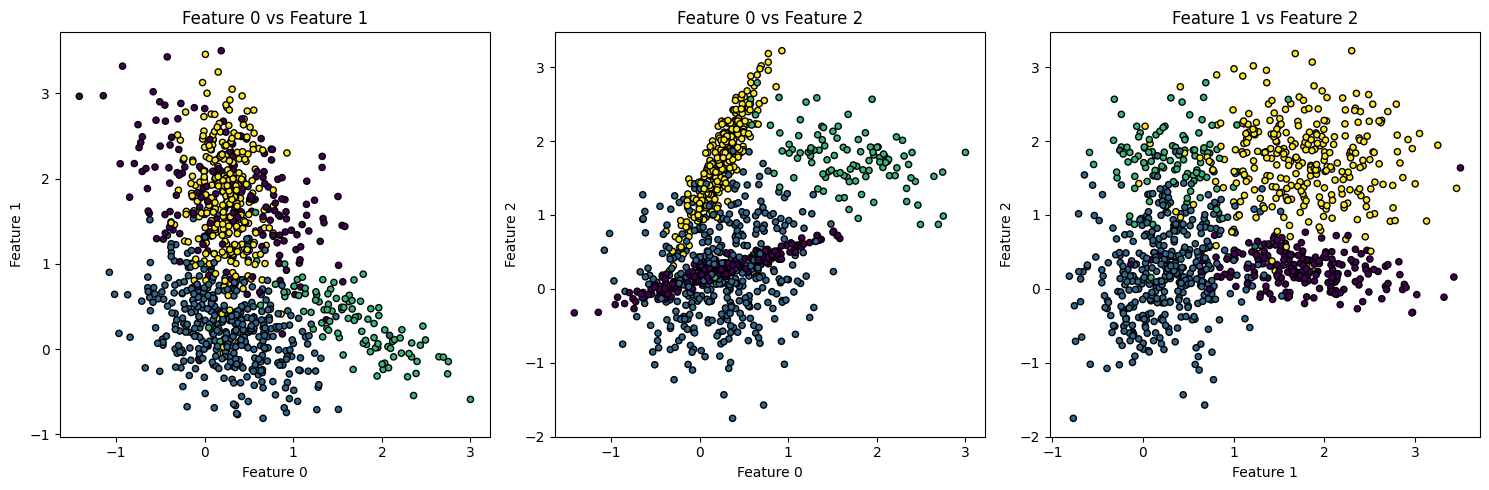

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Feature combinations
combinations = [(0, 1), (0, 2), (1, 2)]

for i, (f1, f2) in enumerate(combinations):
    ax[i].scatter(X[:, f1], X[:, f2], c=y, cmap='viridis', edgecolor='k', s=20)
    ax[i].set_xlabel(f'Feature {f1}')
    ax[i].set_ylabel(f'Feature {f2}')
    ax[i].set_title(f'Feature {f1} vs Feature {f2}')

plt.tight_layout()
plt.show()


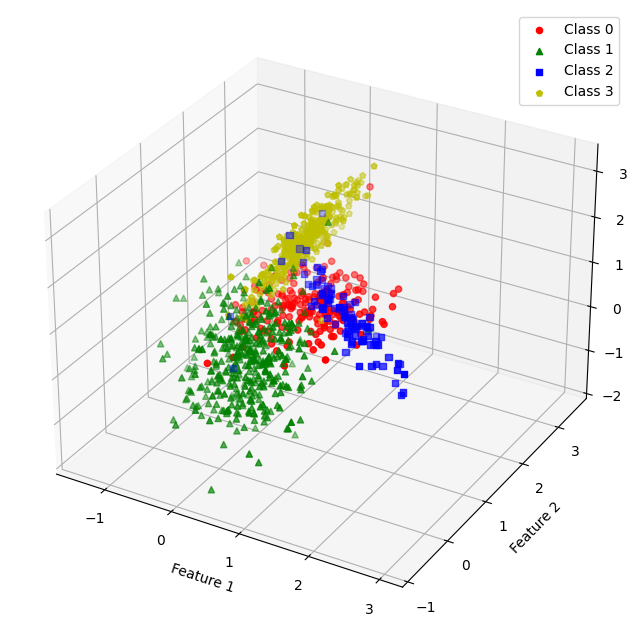

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y']
markers = ['o', '^', 's', 'p']

for class_label in np.unique(y):
    ax.scatter(X[y == class_label, 0], X[y == class_label, 1], X[y == class_label, 2],
               c=colors[class_label], marker=markers[class_label], label=f'Class {class_label}')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

ax.legend()

plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=64,test_size=0.25)

In [6]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

model1 = LogisticRegression(solver='sag', max_iter=200, random_state=64)
model1.fit(X_train, y_train)

model2 = SGDClassifier(loss='log_loss', random_state=64)
model2.fit(X_train, y_train)


SGDClassifier(loss='log_loss', random_state=64)

In [7]:
yhat1 = model1.predict(X_test)
yhat2 = model2.predict(X_test)

In [ ]:
model1.predict_proba(X_test)

In [8]:
model1.score(X_train, y_train)

0.94

In [9]:
model1.score(X_test, y_test)

0.9

In [10]:
model2.score(X_train, y_train)

0.9213333333333333

In [11]:
model2.score(X_test, y_test)

0.9

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model1_report = classification_report(y_test,yhat1)
model2_report = classification_report(y_test,yhat2)
print(model1_report)
print(model2_report)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        51
           1       0.86      0.92      0.89        90
           2       1.00      0.84      0.92        32
           3       0.90      0.91      0.90        77

    accuracy                           0.90       250
   macro avg       0.92      0.89      0.90       250
weighted avg       0.90      0.90      0.90       250

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        51
           1       0.88      0.93      0.90        90
           2       1.00      0.84      0.92        32
           3       0.91      0.88      0.89        77

    accuracy                           0.90       250
   macro avg       0.92      0.89      0.90       250
weighted avg       0.90      0.90      0.90       250



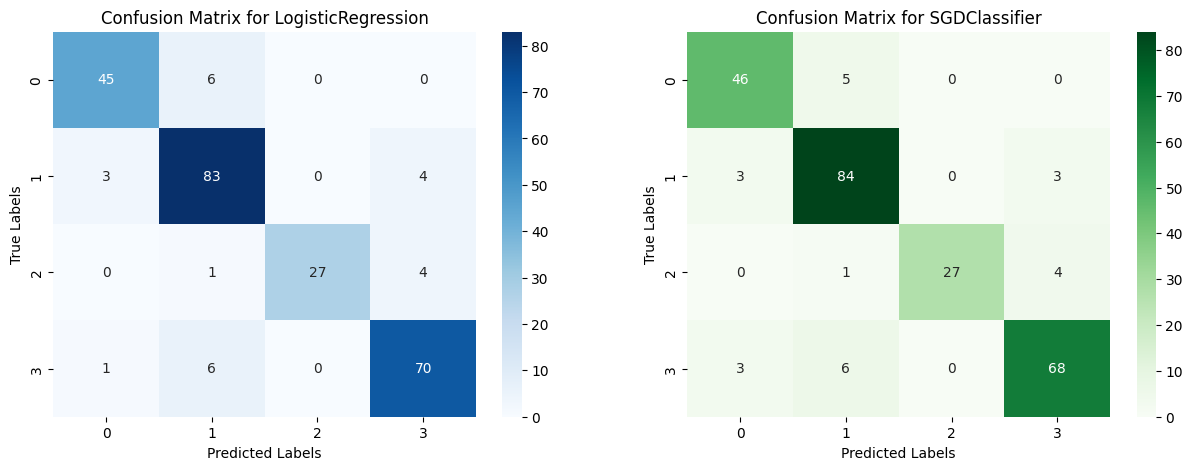

In [13]:
import seaborn as sns

cm1 = confusion_matrix(y_test, yhat1)
cm2 = confusion_matrix(y_test, yhat2)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(cm1, ax=ax[0], annot=True, fmt='d', cmap='Blues')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')
ax[0].set_title('Confusion Matrix for LogisticRegression')

sns.heatmap(cm2, ax=ax[1], annot=True, fmt='d', cmap='Greens')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')
ax[1].set_title('Confusion Matrix for SGDClassifier')

plt.show()



In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/lin

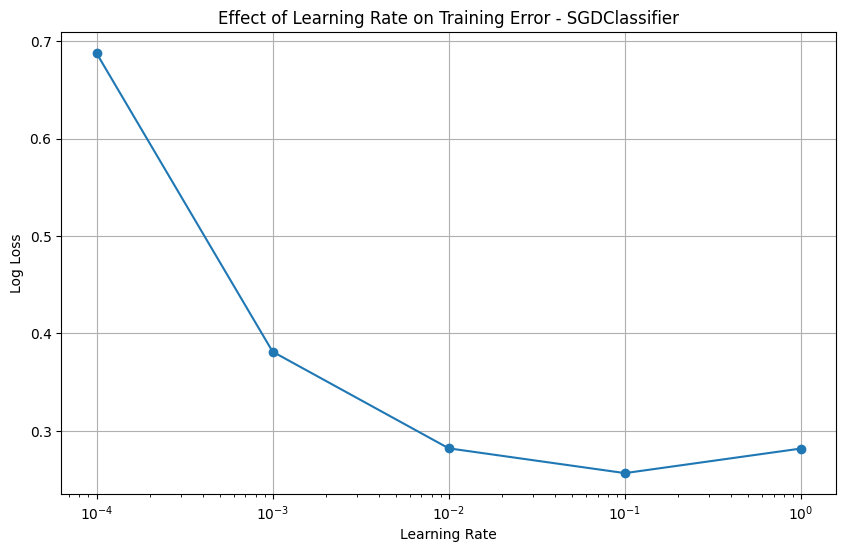

In [15]:
from sklearn.metrics import log_loss

learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]

log_losses = []

for lr in learning_rates:

    model = SGDClassifier(loss='log',
                          learning_rate='constant',
                          eta0=lr,
                          penalty='l2',
                          max_iter=100,
                          tol=1e-3,
                          random_state=64)

    model.fit(X_train_scaled, y_train)

    y_pred_prob = model.predict_proba(X_train_scaled)

    loss = log_loss(y_train, y_pred_prob)
    log_losses.append(loss)

plt.figure(figsize=(10, 6))
plt.plot(learning_rates, log_losses, marker='o')
plt.title('Effect of Learning Rate on Training Error - SGDClassifier')
plt.xlabel('Learning Rate')
plt.ylabel('Log Loss')
plt.xscale('log')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_mod

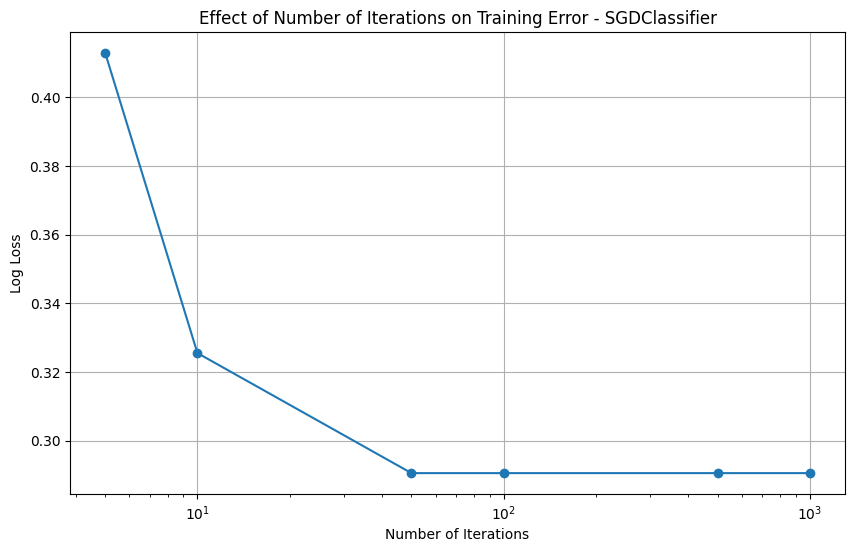

In [16]:
max_iters = [5, 10, 50, 100, 500, 1000]

log_losses = []

for max_iter in max_iters:

    model = SGDClassifier(loss='log',
                          max_iter=max_iter,
                          tol=1e-3,
                          random_state=64)

    model.fit(X_train_scaled, y_train)

    y_pred_prob = model.predict_proba(X_train_scaled)

    loss = log_loss(y_train, y_pred_prob)
    log_losses.append(loss)

plt.figure(figsize=(10, 6))
plt.plot(max_iters, log_losses, marker='o')
plt.title('Effect of Number of Iterations on Training Error - SGDClassifier')
plt.xlabel('Number of Iterations')
plt.ylabel('Log Loss')
plt.xscale('log')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


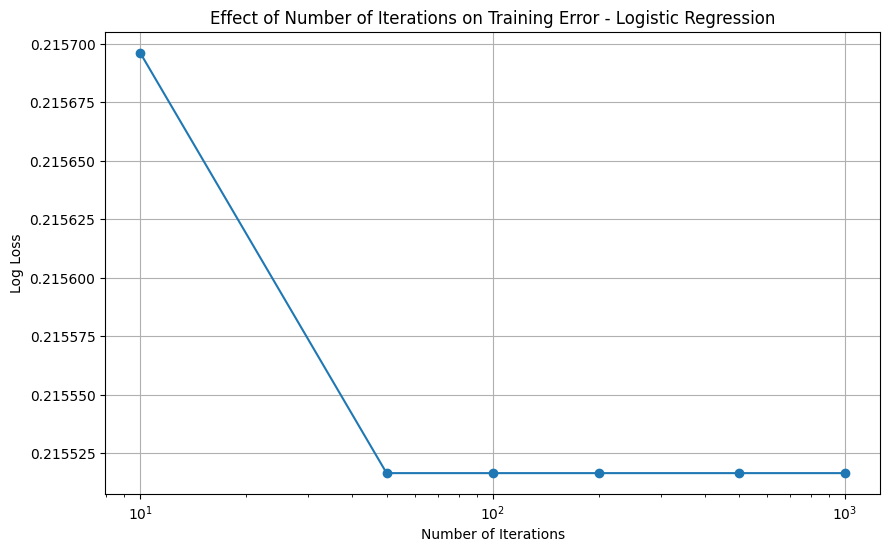

In [17]:
max_iters = [10, 50, 100, 200, 500, 1000]

log_losses = []

for max_iter in max_iters:

    model = LogisticRegression(max_iter=max_iter, solver='lbfgs', random_state=64)

    model.fit(X_train_scaled, y_train)

    y_pred_prob = model.predict_proba(X_train_scaled)

    loss = log_loss(y_train, y_pred_prob)
    log_losses.append(loss)

plt.figure(figsize=(10, 6))
plt.plot(max_iters, log_losses, marker='o')
plt.title('Effect of Number of Iterations on Training Error - Logistic Regression')
plt.xlabel('Number of Iterations')
plt.ylabel('Log Loss')
plt.xscale('log')
plt.grid(True)
plt.show()


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'sag']
}

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=64)

# Initialize the Grid Search model
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model using the best parameters
best_model1 = LogisticRegression(**best_parameters)
best_model1.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred = best_model1.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_parameters)
print("Best Cross-Validation Score:", best_score)
print("Test Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Best Cross-Validation Score: 0.9399999999999998
Test Accuracy: 0.9


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.f

In [19]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'max_iter': [100, 500, 1000],
    'tol': [1e-2, 1e-3, 1e-4]
}

sgd = SGDClassifier(random_state=64)

grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

best_model2 = SGDClassifier(**best_parameters)
best_model2.fit(X_train_scaled, y_train)

y_pred = best_model2.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_parameters)
print("Best Cross-Validation Score:", best_score)
print("Test Accuracy:", accuracy)


Best Parameters: {'alpha': 0.001, 'learning_rate': 'optimal', 'max_iter': 100, 'penalty': 'elasticnet', 'tol': 0.01}
Best Cross-Validation Score: 0.9239999999999998
Test Accuracy: 0.892


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1620 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 892, in fit
    self._more_validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 149, in _more_validate_params
    raise ValueError("eta0 must be 

In [20]:
yhat11 = best_model1.predict(X_test_scaled)
yhat22 = best_model2.predict(X_test_scaled)

In [ ]:
model1_report = classification_report(y_test,yhat11)
model2_report = classification_report(y_test,yhat22)
print(model1_report)
print(model2_report)

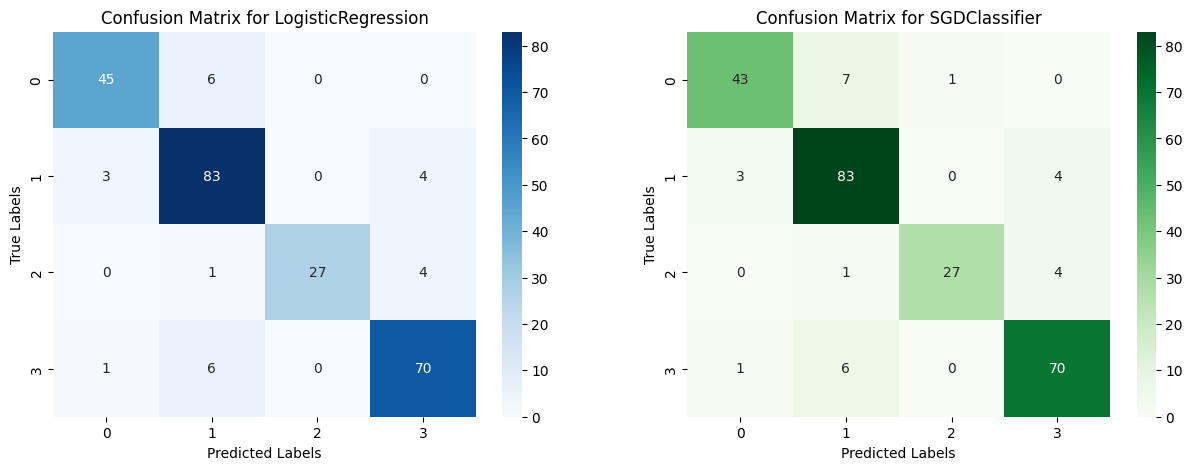

In [22]:
cm1 = confusion_matrix(y_test, yhat11)
cm2 = confusion_matrix(y_test, yhat22)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(cm1, ax=ax[0], annot=True, fmt='d', cmap='Blues')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')
ax[0].set_title('Confusion Matrix for LogisticRegression')

sns.heatmap(cm2, ax=ax[1], annot=True, fmt='d', cmap='Greens')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')
ax[1].set_title('Confusion Matrix for SGDClassifier')

plt.show()

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


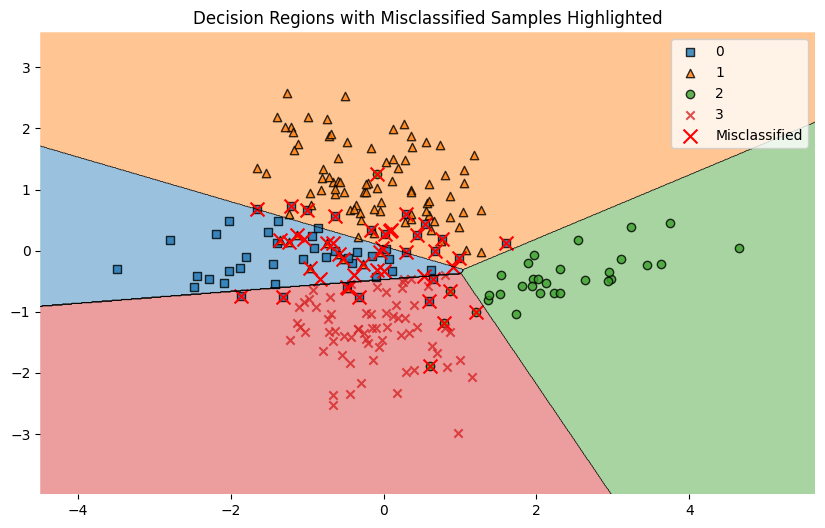

In [24]:
from mlxtend.plotting import plot_decision_regions


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
best_model1.fit(X_train_pca, y_train)

y_pred = best_model1.predict(X_test_pca)

misclassified = np.where(y_test != y_pred)[0]

plt.figure(figsize=(10, 6))
plot_decision_regions(X_test_pca, y_test, clf=best_model1, legend=2)

plt.scatter(X_test_pca[misclassified, 0], X_test_pca[misclassified, 1],
            color='red', label='Misclassified', marker='x', s=100)

plt.title('Decision Regions with Misclassified Samples Highlighted')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


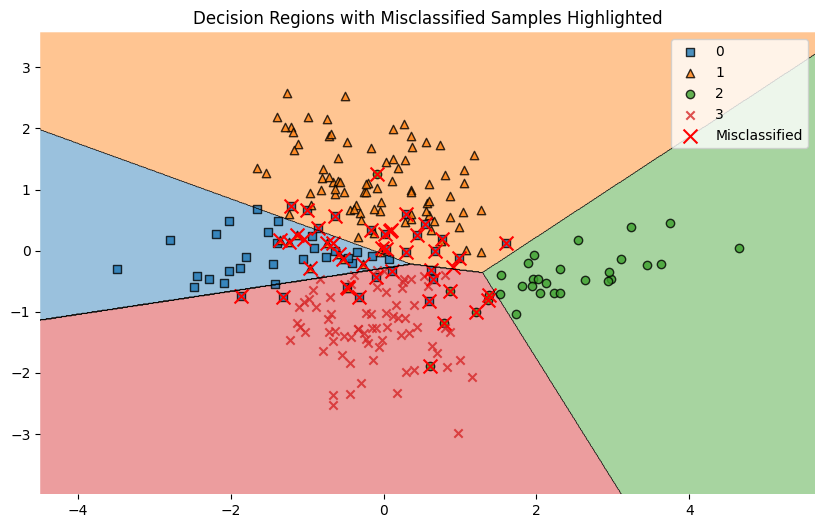

In [25]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
best_model2.fit(X_train_pca, y_train)

y_pred = best_model2.predict(X_test_pca)

misclassified = np.where(y_test != y_pred)[0]

plt.figure(figsize=(10, 6))
plot_decision_regions(X_test_pca, y_test, clf=best_model2, legend=2)

plt.scatter(X_test_pca[misclassified, 0], X_test_pca[misclassified, 1],
            color='red', label='Misclassified', marker='x', s=100)

plt.title('Decision Regions with Misclassified Samples Highlighted')
plt.legend()
plt.show()

In [ ]:
pip install drawdata

In [29]:
from drawdata import ScatterWidget

widget = ScatterWidget()
widget

ScatterWidget()

In [ ]:
widget.data

In [ ]:
dfnew = widget.data_as_pandas

In [ ]:
custom_df = dfnew.drop('color', axis=1)

In [28]:
custom_df = pd.read_csv("/content/custom_data.csv")

In [29]:
custom_df

,x,y,label
0,217.677859,461.840707,a
1,197.522879,399.969898,a
2,177.698315,401.817968,a
3,255.820254,479.504796,a
4,248.588776,390.459529,a
...,...,...,...
1078,143.921278,191.547640,c
1079,143.213640,181.382585,c
1080,177.442598,131.180581,c
1081,104.385097,142.715326,c


In [30]:
from sklearn.preprocessing import LabelEncoder

y1 = custom_df['label']
label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(y1)
X1 = custom_df.drop('label',axis=1)
X_train_custom, X_test_custom, y_train_custom, y_test_custom = train_test_split(
  X1,y1 , random_state=64,test_size=0.25, shuffle = True)

In [31]:
model1_custom = LogisticRegression(solver='sag', max_iter=200, random_state=64)
model1_custom.fit(X_train_custom, y_train_custom)

model2_custom = SGDClassifier(loss='log_loss', random_state=64)
model2_custom.fit(X_train_custom, y_train_custom)

SGDClassifier(loss='log_loss', random_state=64)

In [32]:
yhat1_custom = model1_custom.predict(X_test_custom)
yhat2_custom = model2_custom.predict(X_test_custom)

In [33]:
model1_custom.score(X_train_custom, y_train_custom), model2_custom.score(X_train_custom, y_train_custom)

(0.6933497536945813, 0.4088669950738916)

In [34]:
model1_custom.score(X_test_custom, y_test_custom), model2_custom.score(X_test_custom, y_test_custom)

(0.6715867158671587, 0.45018450184501846)

In [14]:
model1_report_custom = classification_report(y_test_custom,yhat1_custom)
model2_report_custom = classification_report(y_test_custom,yhat2_custom)
print(model1_report_custom)
print(model2_report_custom)

NameError: name 'classification_report' is not defined

In [15]:
cm1_custom = confusion_matrix(y_test_custom, yhat1_custom)
cm2_custom = confusion_matrix(y_test_custom, yhat2_custom)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(cm1_custom, ax=ax[0], annot=True, fmt='d', cmap='Blues')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')
ax[0].set_title('Confusion Matrix for LogisticRegression')

sns.heatmap(cm2_custom, ax=ax[1], annot=True, fmt='d', cmap='Greens')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')
ax[1].set_title('Confusion Matrix for SGDClassifier')

plt.show()


NameError: name 'confusion_matrix' is not defined

In [35]:
scaler = StandardScaler()
X_train_scaled_custom = scaler.fit_transform(X_train_custom)
X_test_scaled_custom = scaler.transform(X_test_custom)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/lin

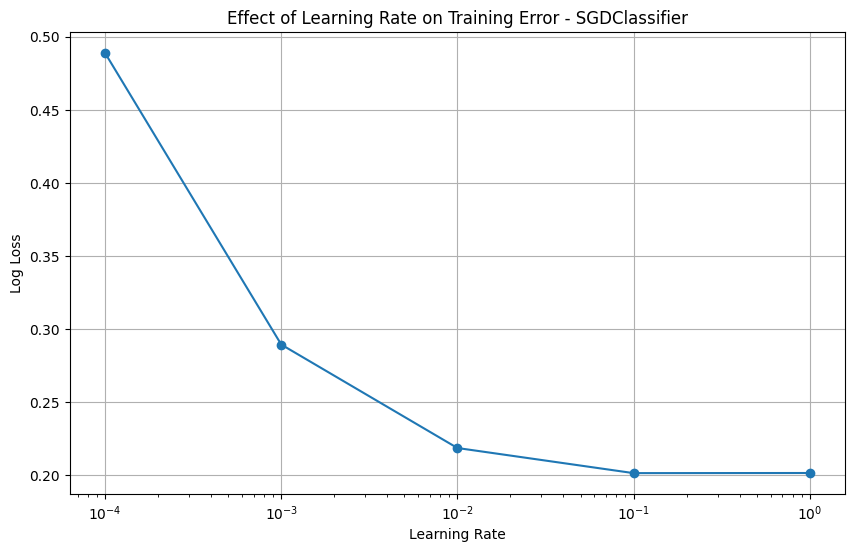

In [36]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]

log_losses = []

for lr in learning_rates:

    model1best = SGDClassifier(loss='log',
                          learning_rate='constant',
                          eta0=lr,
                          penalty='l2',
                          max_iter=100,
                          tol=1e-3,
                          random_state=64)

    model1best.fit(X_train_scaled_custom, y_train_custom)

    y_pred_prob_custom = model1best.predict_proba(X_train_scaled_custom)

    loss = log_loss(y_train_custom, y_pred_prob_custom)
    log_losses.append(loss)

plt.figure(figsize=(10, 6))
plt.plot(learning_rates, log_losses, marker='o')
plt.title('Effect of Learning Rate on Training Error - SGDClassifier')
plt.xlabel('Learning Rate')
plt.ylabel('Log Loss')
plt.xscale('log')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_mod

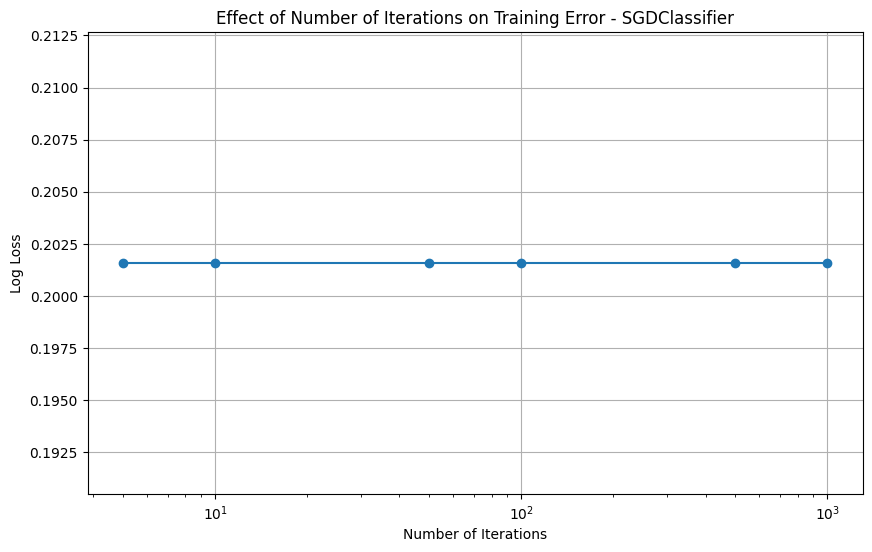

In [61]:
max_iters = [5, 10, 50, 100, 500, 1000]

log_losses = []

for max_iter in max_iters:

    model1best1 = SGDClassifier(loss='log',
                          max_iter=max_iter,
                          tol=1e-3,
                          random_state=64)

    model1best1.fit(X_train_scaled_custom, y_train_custom)

    y_pred_prob_custom1 = model1best1.predict_proba(X_train_scaled_custom)

    loss = log_loss(y_train_custom, y_pred_prob_custom)
    log_losses.append(loss)

plt.figure(figsize=(10, 6))
plt.plot(max_iters, log_losses, marker='o')
plt.title('Effect of Number of Iterations on Training Error - SGDClassifier')
plt.xlabel('Number of Iterations')
plt.ylabel('Log Loss')
plt.xscale('log')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

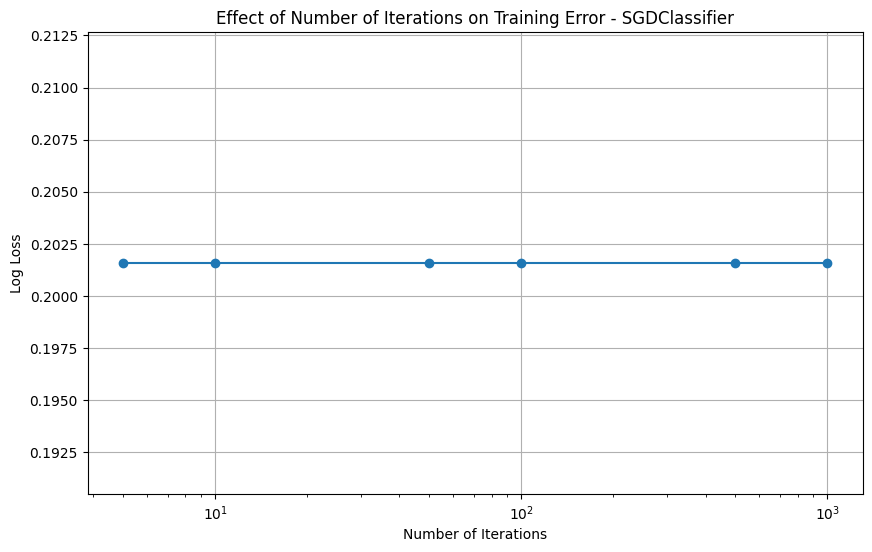

In [62]:
max_iters = [5, 10, 50, 100, 500, 1000]

log_losses = []

for max_iter in max_iters:

    model1best2 = LogisticRegression(max_iter=max_iter, solver='lbfgs', random_state=64)

    model1best2.fit(X_train_scaled_custom, y_train_custom)

    y_pred_prob_custom2 = model1best1.predict_proba(X_train_scaled_custom)

    loss = log_loss(y_train_custom, y_pred_prob_custom)
    log_losses.append(loss)

plt.figure(figsize=(10, 6))
plt.plot(max_iters, log_losses, marker='o')
plt.title('Effect of Number of Iterations on Training Error - SGDClassifier')
plt.xlabel('Number of Iterations')
plt.ylabel('Log Loss')
plt.xscale('log')
plt.grid(True)
plt.show()

In [37]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'sag']
}

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=64)

# Initialize the Grid Search model
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled_custom, y_train_custom)

# Get the best parameters and score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model using the best parameters
best_model1 = LogisticRegression(**best_parameters)
best_model1.fit(X_train_scaled_custom, y_train_custom)

# Predict and evaluate the model
y_pred = best_model1.predict(X_test_scaled_custom)
accuracy = accuracy_score(y_test_custom, y_pred)

print("Best Parameters:", best_parameters)
print("Best Cross-Validation Score:", best_score)
print("Test Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Score: 0.937180943724911
Test Accuracy: 0.955719557195572


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following

In [38]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'max_iter': [100, 500, 1000],
    'tol': [1e-2, 1e-3, 1e-4]
}

sgd = SGDClassifier(random_state=64)

grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled_custom, y_train_custom)

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

best_model2 = SGDClassifier(**best_parameters)
best_model2.fit(X_train_scaled_custom, y_train_custom)

y_pred = best_model2.predict(X_test_scaled_custom)
accuracy = accuracy_score(y_test_custom, y_pred)

print("Best Parameters:", best_parameters)
print("Best Cross-Validation Score:", best_score)
print("Test Accuracy:", accuracy)

Best Parameters: {'alpha': 0.001, 'learning_rate': 'optimal', 'max_iter': 100, 'penalty': 'l1', 'tol': 0.01}
Best Cross-Validation Score: 0.9310384003635537
Test Accuracy: 0.9630996309963099


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1620 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 892, in fit
    self._more_validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 149, in _more_validate_params
    raise ValueError("eta0 must be 

In [39]:
yhat11_custom = best_model1.predict(X_test_scaled_custom)
yhat22_custom = best_model2.predict(X_test_scaled_custom)

In [20]:
model1_report_custom = classification_report(y_test_custom,yhat11_custom)
model2_report_custom = classification_report(y_test_custom,yhat22_custom)
print(model1_report_custom)
print(model2_report_custom)

NameError: name 'classification_report' is not defined

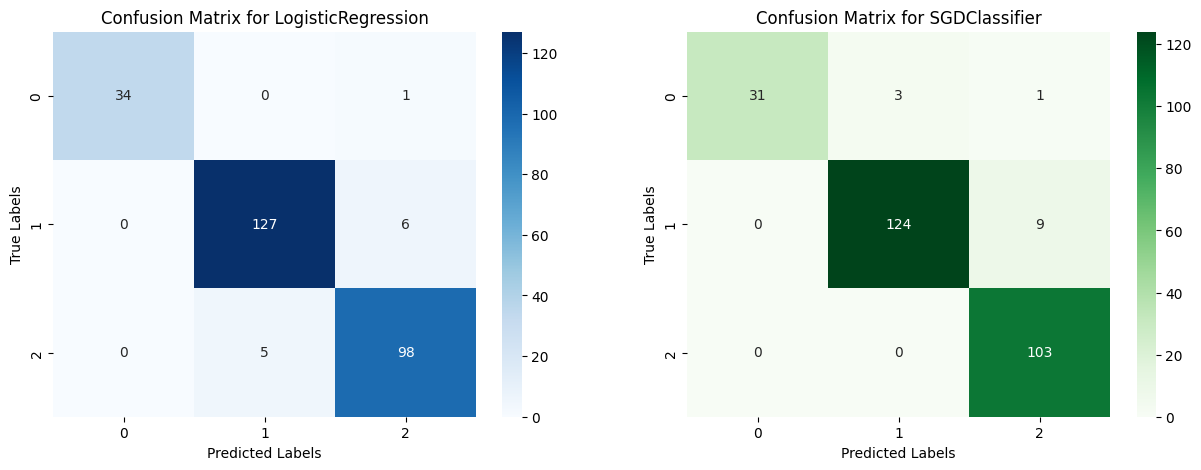

In [67]:
cm11_custom = confusion_matrix(y_test_custom, yhat11_custom)
cm22_custom = confusion_matrix(y_test_custom, yhat22_custom)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(cm11_custom, ax=ax[0], annot=True, fmt='d', cmap='Blues')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')
ax[0].set_title('Confusion Matrix for LogisticRegression')

sns.heatmap(cm22_custom, ax=ax[1], annot=True, fmt='d', cmap='Greens')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')
ax[1].set_title('Confusion Matrix for SGDClassifier')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


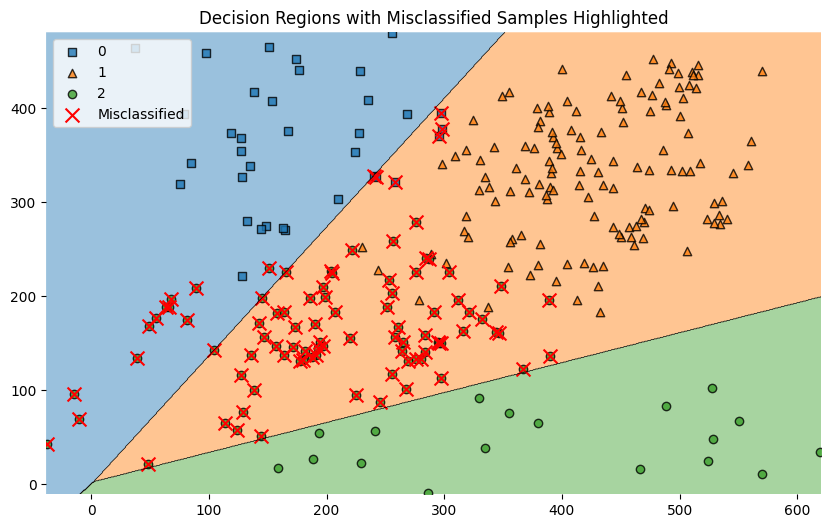

In [55]:
best_model1.fit(X_train_custom, y_train_custom)

y_pred = best_model1.predict(X_test_custom)

misclassified = np.where(y_test_custom != y_pred)[0]

X_test_array = X_test_custom.to_numpy() if hasattr(X_test_custom, 'to_numpy') else X_test_custom

plt.figure(figsize=(10, 6))
plot_decision_regions(X_test_array, y_test_custom, clf=best_model1, legend=2)

plt.scatter(X_test_array[misclassified, 0], X_test_array[misclassified, 1],
            color='red', label='Misclassified', marker='x', s=100)

plt.title('Decision Regions with Misclassified Samples Highlighted')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


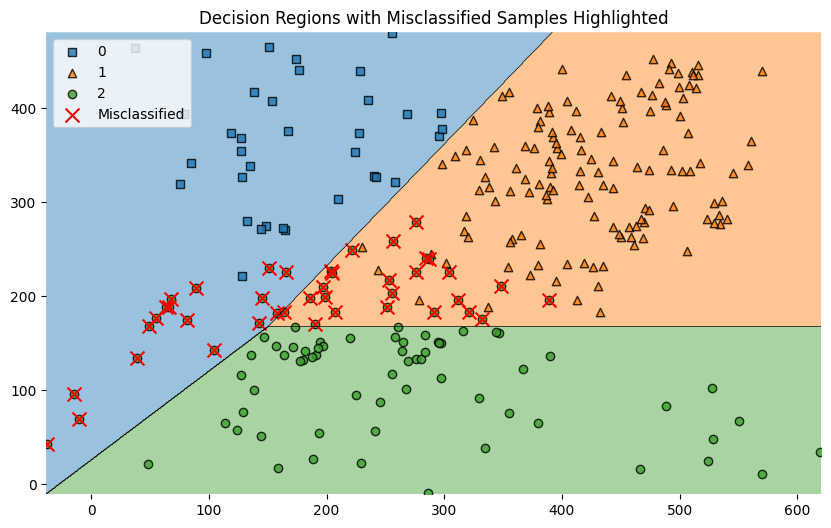

In [56]:
best_model2.fit(X_train_custom, y_train_custom)

y_pred = best_model2.predict(X_test_custom)

misclassified = np.where(y_test_custom != y_pred)[0]

X_test_array = X_test_custom.to_numpy() if hasattr(X_test_custom, 'to_numpy') else X_test_custom

plt.figure(figsize=(10, 6))
plot_decision_regions(X_test_array, y_test_custom, clf=best_model2, legend=2)

plt.scatter(X_test_array[misclassified, 0], X_test_array[misclassified, 1],
            color='red', label='Misclassified', marker='x', s=100)

plt.title('Decision Regions with Misclassified Samples Highlighted')
plt.legend()
plt.show()